# Project: Wrangling and Analyze Data

### Dataset Description

The dataset used for this project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10 while the numerators are always greater than 10.

WeRateDogs has over 4 million followers and has received international media coverage.

The task involved are: gathering data, assessing data, cleaning data, storing data, analyzing, and visualizing data. in conclusion, the results of the data will be reported.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#import important modules
import pandas as pd
import numpy as np
import wptools
import os
import re
import requests
from PIL import Image
from io import BytesIO

In [4]:
#download file programmatically
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
# save to file
with open("image_prediction.tsv", mode = "wb") as file:
    file.write(response.content)
image_prediction = pd.read_csv('image_prediction.tsv',sep="\t")
image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

**NOTE**: **I tried to use the Twitter API, but even after debugging, it didn't work. That's why I used the alternative json file that was given.**

In [5]:
import pandas as pd
tweet_json = pd.read_json('tweet_json.txt', lines = True)
tweet_json= pd.DataFrame(tweet_json)
tweet_json = tweet_json[['id', 'retweet_count','favorite_count']]
tweet_json.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [6]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



**ASSESSING THE *TWITTER_ARCHIVE* DATA VISUALLY**

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**ASSESSING THE *TWITTER_ARCHIVE* DATA PROGRAMMATICALLY**

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# code to view rows and columns in the dataset
twitter_archive.shape

(2356, 17)

In [9]:
# code to check for duplicates
twitter_archive.duplicated().sum()

0

In [10]:
# code to check the statistics of the dataset
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
# code toprint out unique names in the dataset
print(twitter_archive['name'].unique())

['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'None' 'Jax' 'Zoey' 'Cassie'
 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus' 'Canela'
 'Gerald' 'Jeffrey' 'such' 'Maya' 'Mingus' 'Derek' 'Roscoe' 'Waffles'
 'Jimbo' 'Maisey' 'Lilly' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah' 'Bella'
 'Grizzwald' 'Rusty' 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary' 'a'
 'Elliot' 'Louis' 'Jesse' 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Emmy' 'Steven'
 'Beau' 'Snoopy' 'Shadow' 'Terrance' 'Aja' 'Penny' 'Dante' 'Nelly' 'Ginger'
 'Benedict' 'Venti' 'Goose' 'Nugget' 'Cash' 'Coco' 'Jed' 'Sebastian'
 'Walter' 'Sierra' 'Monkey' 'Harry' 'Kody' 'Lassie' 'Rover' 'Napolean'
 'Dawn' 'Boomer' 'Cody' 'Rumble' 'Clifford' 'quite' 'Dewey' 'Scout' 'Gizmo'
 'Cooper' 'Harold' 'Shikha' 'Jamesy' 'Lili' 'Sammy' 'Meatball' 'Paisley'
 'Albus' 'Neptune' 'Quinn' 'Belle' 'Zooey' 'Dave' 'Jersey' 'Hobbes' 'Burt'
 'Lorenzo' 'Carl' 'Jordy' 'Milky' 'Trooper' 'Winston' 'Sophie' 'Wyatt'
 'Rosie' 'Thor' 'Oscar' 'Luna' 'Callie' 'Cermet' 'George'

In [11]:
# code to checking for invalid names
twitter_archive[twitter_archive.name.str.islower() == True].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
getting          2
mad              2
actually         2
not              2
life             1
his              1
my               1
such             1
this             1
officially       1
space            1
unacceptable     1
old              1
by               1
incredibly       1
infuriating      1
all              1
light            1
Name: name, dtype: int64

**ASSESSING THE *IMAGE PREDICTION* DATA VISUALLY**

In [12]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**ASSESSING THE *IMAGE PREDICTION* DATA PROGRAMMATICALLY**

In [13]:
#to view basic information about the columns
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#to display the number of rows and colums 
image_prediction.shape

(2075, 12)

In [15]:
#to describe statistical information of the dataset
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
image_prediction['jpg_url'].duplicated().sum()

66

**ASSESSING THE *TWEET_JSON* DATA VISUALLY**

In [17]:
tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


**ASSESSING THE *TWEET_JSON* DATA PROGRAMMATICALLY**

In [9]:
# to view the columns and datatypes in the dataset
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
#to display number of rows and column
tweet_json.shape

(2354, 3)

In [20]:
# code to check for null values in the columns
tweet_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [21]:
#checking for duplicated values
tweet_json.duplicated().sum()

0

### Quality issues
**Twitter Archive Table**
1. There are retweets and replies in the dataset. Since we want original ratings without retweets and replies i will have to delete them.

2. There are a lot of null values in the following columns:  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp. these columns willbe dropped.

3. Datatype issues: Timestamp and retweeted_status_timestamp columns should be in date and time datatype. Tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be in string (object) datatype and not int or float

4. The source column has rows with html in them which are not human readable

5. There are some invalid names in the name column such as: a, the, and, very. The names are in lower case.


**Image Prediction Table**

6. Some column names are not descriptive for a clearer understanding. e.g. p1, p2

7. The Jpg_url column have duplicate entries with different ID's

8. Some entries have p1_dog, p2_dog, p3_dog set to false. These are not dogs 

**All Tables**

9. Tweet_id columns for all the tables should be string datatype for easy merging 

### Tidiness issues
1. The columns, doggo, floofer, pupper and puppo in the tweet archive table should be combined to one column.

2. Tweet_json dataframe should be merged with twitter_archive dataframe

3. All the tables should be combined in one dataframe 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [12]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: 

<p>There are tweets and replies in the following columns:  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp. The columns also contains replies and retweets</p>

#### Define: 

<p> Since we want originalratings without replies and retweets we will remove them.</p>

#### Code

In [13]:
# To remove the retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

# To remove the replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

### Test

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

Observation: the tweets and replies have been removed successfully.

### Issue 2
These columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp columns are not needed for this analysis.

### Define
The columns that are not needed for this should be dropped.

### Code

In [14]:
#dropping these columns from the dataset: 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id' and 'retweeted_status_timestamp'
twitter_archive_clean  = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                                                     'retweeted_status_timestamp'],
                                                   axis = 1)

#### Test

In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


observation: these columns have been removed.

### Issue #3:

Columnns have incorrect datatypes

#### Define

I'd be changinging 'Tweet_id' column datatype to **string** and 'timestamp' column datatype to **datetime**. All other colums with incorrect datatypes have been dropped. 

#### Code

In [15]:
#changing tweet_id datatype from int to string
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [16]:
#changing timestamp datatype from object to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [18]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


Observation:  'Tweet_id' and 'timestamp'columns datatype has been changed to string and datetime respectively

### Issue #4:

<p>The source column has rows with HTML in them which are not human readable</p>

#### Define

Removing HTML from rows in source column

#### Code

In [17]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [20]:
twitter_archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #5:

Invalid names in the **name** column such as: a, the, and, very, actually. The names are in lower case.

#### Define

Replace all the invalid names (lower case names) with NaN 

#### Code

In [21]:
#user defined function to replace entries with lower case to NaN values
for item in twitter_archive_clean.name:
    if item.islower() == True:
        twitter_archive_clean.name =  twitter_archive_clean.name.replace(item, 'None')
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)

#### Test

In [22]:
twitter_archive_clean[twitter_archive_clean.name.str.islower() == True].name

Series([], Name: name, dtype: object)

In [31]:
twitter_archive_clean['name'].value_counts()

None            603
a                55
Lucy             11
Charlie          11
Cooper           10
Oliver           10
Penny             9
Tucker            9
the               8
Lola              8
Sadie             8
Winston           8
Daisy             7
Toby              7
Stanley           6
Bailey            6
Bella             6
Jax               6
Koda              6
Oscar             6
an                6
Bo                6
Milo              5
Bentley           5
Louis             5
Leo               5
Scout             5
Rusty             5
Buddy             5
Dave              5
               ... 
Todo              1
Eugene            1
Hermione          1
Ebby              1
Kulet             1
Livvie            1
Klein             1
Jordy             1
Carbon            1
Ron               1
Liam              1
Chase             1
Bobbay            1
Ike               1
Monkey            1
Iggy              1
Rover             1
Sunshine          1
Alexanderson      1


Observation:  invalid names have been removed.

In [32]:
#code to view information about the colmns in the dataset
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


In [19]:
#code for gathering all ratings,index and texts for tweets that that have decimal in their numerator using a for loop  
text_ratings_dec = []
index_ratings_dec = []
ratings_dec = []

for i, text in twitter_archive_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        text_ratings_dec.append(text)
        index_ratings_dec.append(i)
        ratings_dec.append(re.search('\d+\.\d+', text).group())


In [20]:
# To print text ratings with decimals
text_ratings_dec

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [21]:
# To print the index of the ratings above with decimal
index_ratings_dec

[45, 695, 763, 1712]

In [36]:
# To convert the above decimal ratings to float
twitter_archive_clean.loc[index_ratings_dec[0],'rating_numerator'] = float(ratings_dec[0])
twitter_archive_clean.loc[index_ratings_dec[1],'rating_numerator'] = float(ratings_dec[1])
twitter_archive_clean.loc[index_ratings_dec[2],'rating_numerator'] = float(ratings_dec[2])
twitter_archive_clean.loc[index_ratings_dec[3],'rating_numerator'] = float(ratings_dec[3])

#### Test

In [22]:
#viewing changes
with pd.option_context('max_colwidth', 100):
    display(twitter_archive_clean[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite...",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af...",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile...,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/...,26,10


In [23]:
#test an index 
twitter_archive_clean.loc[45]

tweet_id                                             883482846933004288
timestamp                                           2017-07-08 00:28:19
source                                               Twitter for iPhone
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                      5
rating_denominator                                                   10
name                                                              Bella
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 45, dtype: object

### Issue #6:

Some column names are not descriptive for a clearer understanding

#### Define

Renaming the columns for better description 

#### Code

In [39]:
#renaming ambigous column names
image_prediction_clean = image_prediction_clean.rename(columns = {'img_num':'image_number', 
            'p1':'first_prediction(p1)', 'p2':'second_prediction(p2)', 'p3':'third_prediction(p3)'})

#### Test

In [40]:
image_prediction_clean.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                 2075 non-null int64
jpg_url                  2075 non-null object
image_number             2075 non-null int64
first_prediction(p1)     2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null bool
second_prediction(p2)    2075 non-null object
p2_conf                  2075 non-null float64
p2_dog                   2075 non-null bool
third_prediction(p3)     2075 non-null object
p3_conf                  2075 non-null float64
p3_dog                   2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #7:

The Jpg_url column have duplicate entries with different ID's

#### Define

Dropping the 66 duplicated URL

#### Code

In [41]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'])

#### Test

In [42]:
image_prediction_clean['jpg_url'].duplicated().sum()

0

### Issue #8:

Some entries have p1_dog, p2_dog, p3_dog set to false. These are not dogs 

#### Define

Drop rows that have p1_dog, p2_dog, p3_dog values set to false

#### Code

In [43]:
# code that will allow only rows with p1_dog, p2_dog and p3_dog set to true to be kept
image_prediction_clean = image_prediction_clean[((image_prediction_clean['p1_dog'] == True) & 
                  (image_prediction_clean['p2_dog'] == True) & 
                  (image_prediction_clean['p3_dog'] == True))]

#### Test

In [44]:
#code that will remove rows with p1_dog, p2_dog, p3_dog set to false 
image_prediction_clean[((image_prediction_clean['p1_dog'] == False) & 
                  (image_prediction_clean['p2_dog'] == False) & 
                  (image_prediction_clean['p3_dog'] == False))]

,tweet_id,jpg_url,image_number,first_prediction(p1),p1_conf,p1_dog,second_prediction(p2),p2_conf,p2_dog,third_prediction(p3),p3_conf,p3_dog


In [45]:
image_prediction_clean

,tweet_id,jpg_url,image_number,first_prediction(p1),p1_conf,p1_dog,second_prediction(p2),p2_conf,p2_dog,third_prediction(p3),p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True


### Issue #9:

Tweet_id columns for all the tables should be string datatype for easy merging 

#### Define

convert all the tweet_id columns to datatype string, for easy merging

#### Code

In [46]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)
tweet_json_clean.id = tweet_json_clean.id.astype(str)

#### Test

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 293.0+ KB


In [48]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id                 1206 non-null object
jpg_url                  1206 non-null object
image_number             1206 non-null int64
first_prediction(p1)     1206 non-null object
p1_conf                  1206 non-null float64
p1_dog                   1206 non-null bool
second_prediction(p2)    1206 non-null object
p2_conf                  1206 non-null float64
p2_dog                   1206 non-null bool
third_prediction(p3)     1206 non-null object
p3_conf                  1206 non-null float64
p3_dog                   1206 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 97.8+ KB


In [49]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


We can confirm the tweet id columns in all tables have been changed to string (object) datatype

### Tidiness issues

### Tidiness Issue #1:

The columns, doggo, floofer, pupper and puppo in the tweet archive table should be combined to one column named dog_type.

#### Define

Combine the 4 columns; doggo, floofer, pupper and puppo into one column named dog_type

#### Code

In [32]:
#code for combining the 4 columns into one column named'dog_type' using lambda function
twitter_archive_clean['dog_type']=None
twitter_archive_clean['dog_type'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean['dog_type'] = twitter_archive_clean['dog_type'].map(lambda x: x.replace("None",""))

twitter_archive_clean.loc[twitter_archive_clean.dog_type == 'doggopupper', 'dog_type'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_type == 'doggopuppo', 'dog_type'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_type == 'doggofloofer', 'dog_type'] = 'doggo, floofer'

In [33]:
# code to drop the individual columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

#### Test

In [34]:
#checking that the 4 columns have been combined into the dog_type column
twitter_archive_clean['dog_type'].value_counts()

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_type, dtype: int64

In [53]:
#view twitter_archive_clean colums
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_type              2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 243.8+ KB


Observation: doggo, floofer, puppo and pupper columns have been merged into dog_type column.

### Tidiness Issue #2:

Tweet_json dataframe should be merged with twitter_archive dataframe for tidiness

#### Define

Merging the tweet_json dataframe with twitter_archive dataframe into a dataframe named twitter_df

#### Code

In [54]:
#code to rename the column 'id' in tweet_json dataframe to 'tweet_id'. Do this first!!
tweet_json_clean = tweet_json_clean.rename(columns = {'id':'tweet_id'})

In [55]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


Observation: 'id' column has been renamed to tweet_id to match with that of the twitter_archive table for easy merging. 
The datatype of the column is string.

In [56]:
# To merge the twitter_archive_clean and the tweet_json_clean dataframe together in a new dataframe called twitter_df
twitter_df = twitter_archive_clean.merge(tweet_json_clean, how='inner', on = 'tweet_id')

#### Test

In [58]:
# code to display three rows to see if the tables have been merged
twitter_df.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count
1481,680161097740095489,2015-12-24 23:00:17,Twitter for iPhone,Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/680161097...,12.0,10,Goliath,,828,2538
245,835172783151792128,2017-02-24 17:01:22,Twitter for iPhone,We only rate dogs. Please don't send in any no...,https://twitter.com/dog_rates/status/835172783...,12.0,10,None,,6516,28552
673,761599872357261312,2016-08-05 16:28:54,Twitter for iPhone,"This is Sephie. According to this picture, she...",https://twitter.com/dog_rates/status/761599872...,11.0,10,Sephie,,1336,4578


### Tidiness Issue #3: All the tables should be combined in one dataframe 

#### Define

Merging the image_prediction table to twitter_df table to become one table named twitter_dataframe

#### Code

In [59]:
# code to merge image_prediction_clean to twitter_df
twitter_dataframe = twitter_df.merge(image_prediction_clean, how='inner', on = 'tweet_id')

#### Test

In [77]:
#code to view the whole dataframe
twitter_dataframe.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,...,image_number,first_prediction(p1),p1_conf,p1_dog,second_prediction(p2),p2_conf,p2_dog,third_prediction(p3),p3_conf,p3_dog
713,699413908797464576,2016-02-16 02:04:04,Twitter for iPhone,Meet Miley. She's a Scandinavian Hollabackgirl...,https://twitter.com/dog_rates/status/699413908...,11.0,10.0,Miley,,688,...,1,Samoyed,0.517479,True,malamute,0.155935,True,Eskimo_dog,0.095001,True


Observation: The three tables, twitter_archive, image_prediction and tweet_json tables have been succesfully combined into one dataframe named-twitter_dataframe.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
twitter_dataframe.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
wrangled_df = pd.read_csv(r'twitter_archive_master.csv')
wrangled_df.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,...,image_number,first_prediction(p1),p1_conf,p1_dog,second_prediction(p2),p2_conf,p2_dog,third_prediction(p3),p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,NaN,16716,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


In [62]:
# code to find out the most used twitter source
wrangled_df.groupby('source').count()['tweet_id']

source
TweetDeck                5
Twitter Web Client      14
Twitter for iPhone    1175
Name: tweet_id, dtype: int64

In [63]:
# To find out the most common dog type
wrangled_df.groupby('dog_type').count()['tweet_id']

dog_type
doggo              39
doggo, floofer      1
doggo, pupper       5
doggo, puppo        1
floofer             6
pupper            119
puppo              18
Name: tweet_id, dtype: int64

In [64]:
# To find out the most common dog name
wrangled_df.name.value_counts()

None         287
a             32
Cooper         9
Charlie        8
Oliver         7
Koda           6
the            6
Sadie          6
Tucker         5
Winston        5
Leo            5
Bo             5
Lucy           5
Toby           5
Bear           4
Stanley        4
Reggie         4
Gus            4
Daisy          4
Oscar          4
Sophie         4
Dave           4
Finn           4
Maggie         4
Scooter        4
Larry          4
Olive          3
Winnie         3
Brody          3
Louis          3
            ... 
Bonaparte      1
Kenneth        1
Vinscent       1
Claude         1
Kenny          1
Jackie         1
Snoopy         1
Andru          1
Nico           1
Vincent        1
Roscoe         1
Scruffers      1
Odie           1
Katie          1
Bubba          1
Bobb           1
Jazzy          1
Carper         1
Schnozz        1
Nigel          1
Luna           1
Butters        1
Rizzo          1
Sweet          1
Davey          1
Major          1
Karma          1
Walter        

In [65]:
# To find out the top 10 predicted p1 dog breeds
wrangled_df['first_prediction(p1)'].value_counts().nlargest(10)

golden_retriever      117
Pembroke               77
Labrador_retriever     74
Chihuahua              50
pug                    39
Pomeranian             28
chow                   26
toy_poodle             26
malamute               26
Samoyed                25
Name: first_prediction(p1), dtype: int64

### Insights:

1. Pupper is the most common dog type, followed by Doggo.

2. Cooper is the most popular dog name, followed by Charlie and then Oliver.

3. Golden Retriever is the most frequent dog breed first prediction.

4. Most of the tweets were done on an iPhone, then on the Twitter web client, and least of all on a tweet deck.


### Visualization

In [66]:
#graphical illustration that shows the relationship between the dog_type, favorite count and the retweet count
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

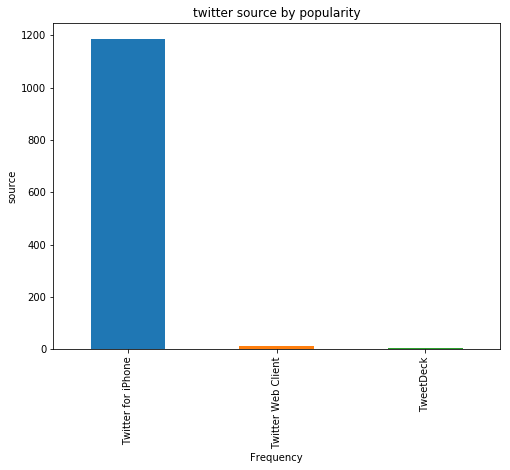

In [88]:
twitter_source = wrangled_df.source.value_counts().nlargest(10).plot(kind = 'bar', figsize =(8,6));
twitter_source.set_title('twitter source by popularity');
twitter_source.set_xlabel('Frequency');
twitter_source.set_ylabel('source');

Text(0.5,1,'Chart depicting the relationship between dog_type, favourite_count and retweet_count')

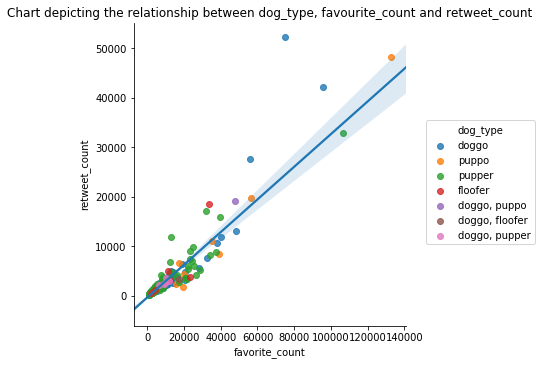

In [69]:
#implot to plot scatter points
graph = sns.lmplot(x='favorite_count', y='retweet_count', hue='dog_type', data=wrangled_df, fit_reg=False)
#regplot for the whole points
sns.regplot(x='favorite_count', y='retweet_count', data=wrangled_df, scatter=False, ax=graph.axes[0, 0])
plt.title('Chart depicting the relationship between dog_type, favourite_count and retweet_count')